<a href="https://colab.research.google.com/github/farieu/data-analysis/blob/AnaliseExploratoria2/eda_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória Adicional Good Reads

## Visuzalizações Adicionais do Dataset.


---


Boxplot, Dispersão, Histogramas, Comparação entre notas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/BackEnd/GoodReads_cleanedwoImput.csv') # Dataset sem Imputação
#df = df[df['genre'] != "Unknown"]

In [3]:
df.shape

(84054, 9)

### Visualizações de 'rating'

Durante o treinamento do modelo (em Regressão Logística), notei que quando o parâmetro de boa avaliação era 4, o modelo ficaria com mais valores em True Negative (quando ele previa que não era uma boa, e de fato não era). Nessa visualização, ploto os valores de rating para comparar e ver se os resultados de avaliação do modelo fazem sentido.

---

Essa visualização de 'rating' engloba o dataset inteiro, e não uma amostra inicial como foi feita na primeira exploratória (de 40%).

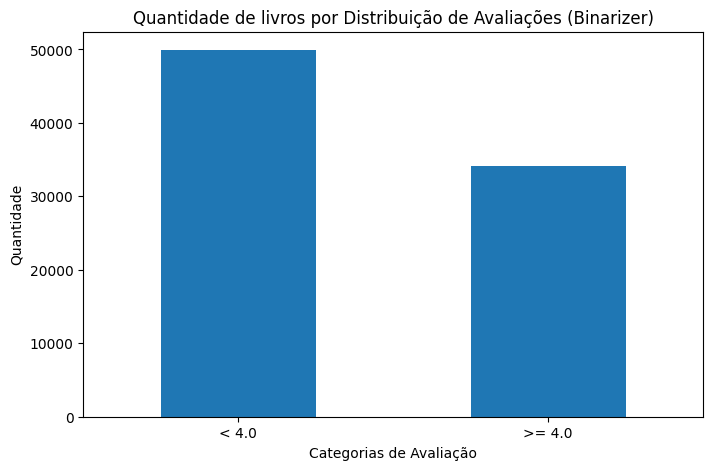

In [4]:
# Visualização sem cor.
df['rating_category'] = df['rating'].apply(lambda x: '>= 4.0' if x >= 4.0 else '< 4.0')

#Contar a quantidade em cada categoria
counts = df['rating_category'].value_counts()

 #Plotar o gráfico de barras
plt.figure(figsize=(8, 5))
counts.plot(kind='bar')
plt.title('Quantidade de livros por Distribuição de Avaliações (Binarizer)')
plt.xlabel('Categorias de Avaliação')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

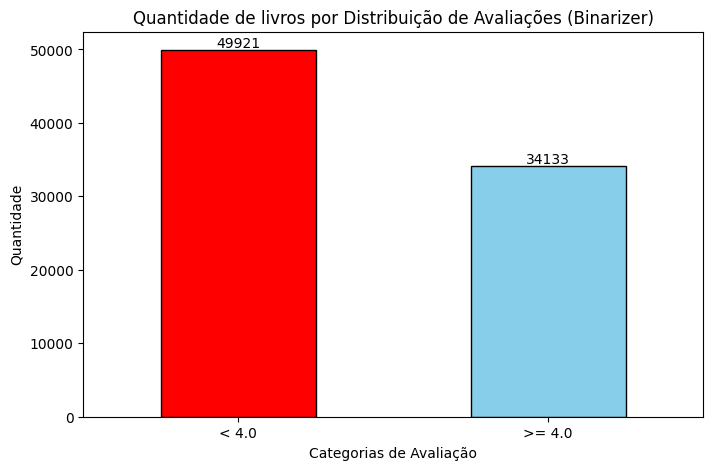

In [5]:
# Colorido para a 4.0
df['rating_category'] = df['rating'].apply(lambda x: '>= 4.0' if x >= 4.0 else '< 4.0')

counts = df['rating_category'].value_counts()

plt.figure(figsize=(8, 5))
bars = counts.plot(kind='bar', color=['red' if category == '< 4.0' else 'skyblue' for category in counts.index], edgecolor='black')

plt.title('Quantidade de livros por Distribuição de Avaliações (Binarizer)')
plt.xlabel('Categorias de Avaliação')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

# Adicionar rótulos de quantidade em cima de cada coluna
for index, value in enumerate(counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

A coluna vermelha representa a classe 0, livros que quando setamos esse parâmetro passam a ser considerados como má avaliação. Já a azul representa a classe 1, livros de boa avaliação.

Quando modificamos para o parâmetro de notas boas de 4.0 para 3.5, a quantidade de livros que são considerados de boa avaliação aumenta estrondosamente!

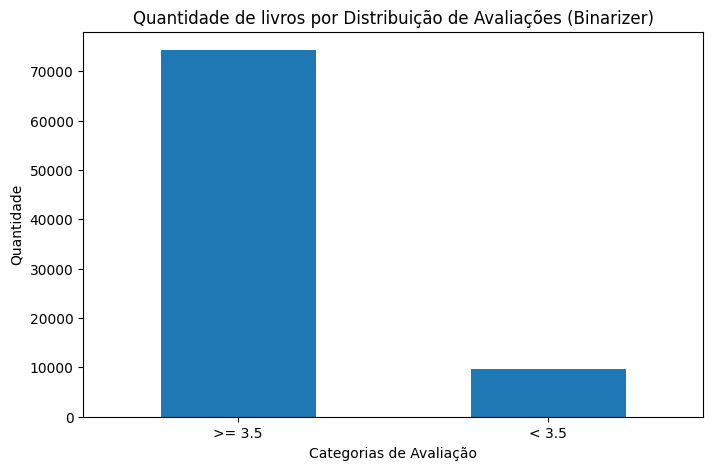

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df['rating_category'] = df['rating'].apply(lambda x: '>= 3.5' if x >= 3.5 else '< 3.5')

# Contar a quantidade em cada categoria
counts = df['rating_category'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 5))
counts.plot(kind='bar')
plt.title('Quantidade de livros por Distribuição de Avaliações (Binarizer)')
plt.xlabel('Categorias de Avaliação')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

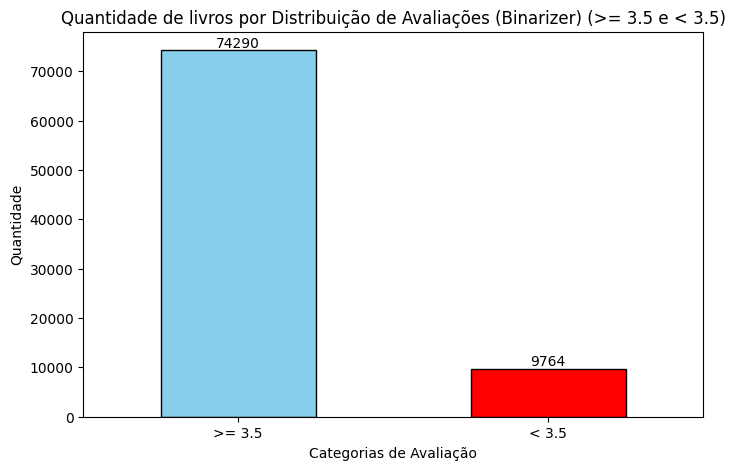

In [7]:
df['rating_category'] = df['rating'].apply(lambda x: '>= 3.5' if x >= 3.5 else '< 3.5')

counts = df['rating_category'].value_counts()

plt.figure(figsize=(8, 5))
bars = counts.plot(kind='bar', color=['red' if category == '< 3.5' else 'skyblue' for category in counts.index], edgecolor='black')

# Adicionando títulos e rótulos
plt.title('Quantidade de livros por Distribuição de Avaliações (Binarizer) (>= 3.5 e < 3.5)')
plt.xlabel('Categorias de Avaliação')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

# Adicionar rótulos de quantidade em cima de cada coluna
for index, value in enumerate(counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()


Com isso, a gente percebe que quando o modelo é treinado com 3.5 como parâmetro, se torna mais fácil identificar como boa avaliação, e mais dificil de categorizar a má avaliação, pois não existem muitos livros < que 3.5

#### Plots com amostragem de 40%

Por conta do tamanho do dataset, foi aplicado uma versão reduzida (40% de amostragem para análise inicial) para que fosse possível efetuar a análise exploratória.

In [8]:
# Selecionar uma amostra de 40% do dataset, com o parâmetro de random state para que seja reprodutível e não mude a cada execução da cédula.
amostradf = df.sample(frac=0.4, random_state=42)

A amostra de 40% é a mesma da primeira análise exploratória, pois o parâmetro permite que seja reprodutível.

O código abaixo gera o gráfico **igual** a [primeira análise](https://colab.research.google.com/drive/1XC71jNSv2WPO62Ss-OfsHXCezKNjYsI3?authuser=1#scrollTo=F1mp8rM9qcVp&line=4&uniqifier=1).

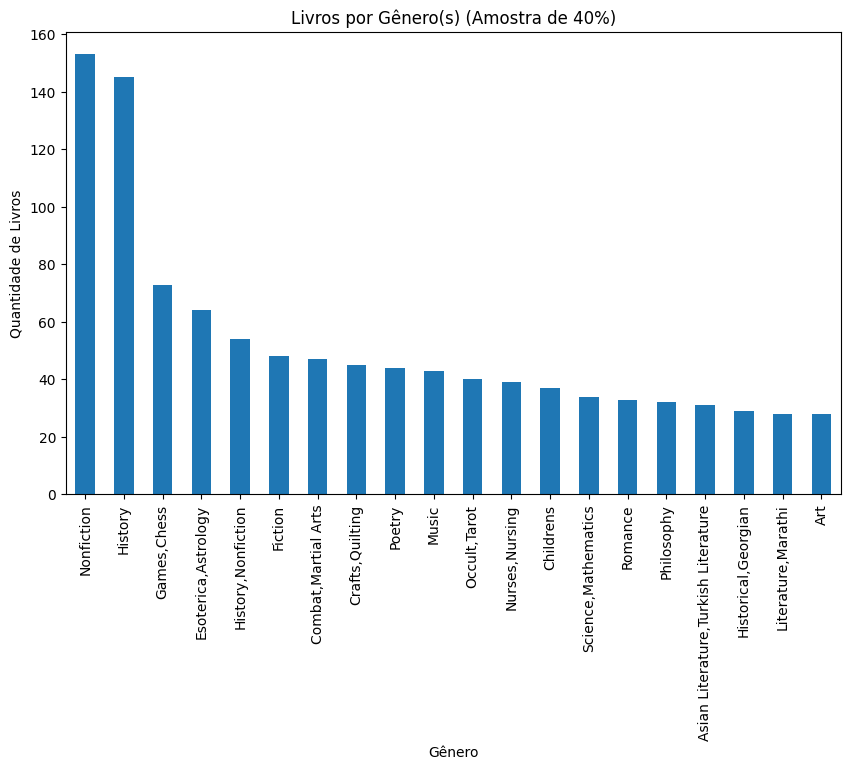

In [9]:
#Gráfico de quantidade de livros por gênero usando a amostra
genre_counts = amostradf['genre'].value_counts().nlargest(20)

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Livros por Gênero(s) (Amostra de 40%)')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Livros')
plt.xticks(rotation=90)
plt.show()

In [10]:
df.shape

(84054, 10)

# Visualizações Adicionais

### Detecção de Outliers pela EDA

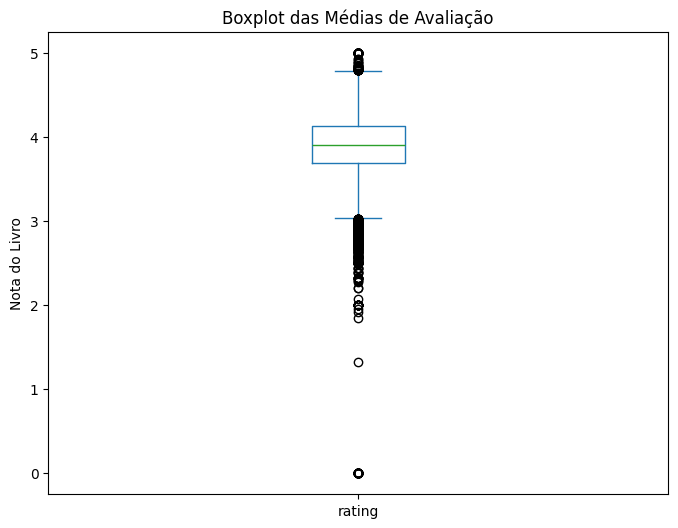

In [11]:
# Boxplot das avaliações para identificar outliers
plt.figure(figsize=(8, 6))
amostradf['rating'].plot(kind='box')
plt.title('Boxplot das Médias de Avaliação')
plt.ylabel('Nota do Livro')
plt.show()

Com o plot de avaliações, é possível perceber que a maioria dos valores se encontram nos limites superior e inferior da box. E é notável a existência de outliers onde a média de avaliação do livro é 0.

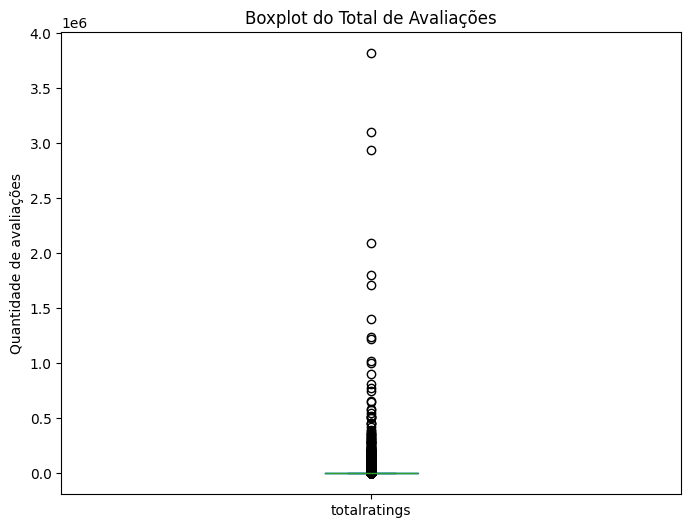

In [12]:
# Boxplot das avaliações para identificar outliers
plt.figure(figsize=(8, 6))
amostradf['totalratings'].plot(kind='box')
plt.title('Boxplot do Total de Avaliações')
plt.ylabel('Quantidade de avaliações')
plt.show()

Para o número total de avaliações, livros com alta quantidade de avaliações por usuários são detectados como outliers, como consta no boxplot acima. Existe um livro com aprox. 100 mil avaliações.

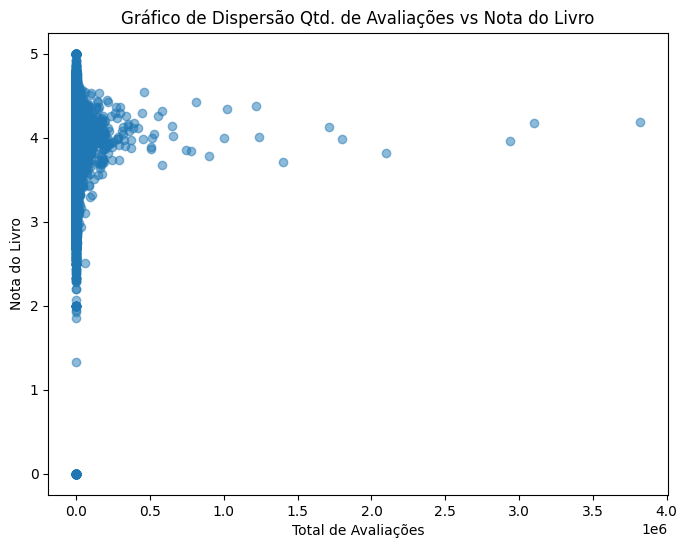

In [13]:
# Gráfico de dispersão para totalratings e rating
plt.figure(figsize=(8, 6))
plt.scatter(amostradf['totalratings'], amostradf['rating'], alpha=0.5)
plt.title('Gráfico de Dispersão Qtd. de Avaliações vs Nota do Livro')
plt.xlabel('Total de Avaliações')
plt.ylabel('Nota do Livro')
plt.show()

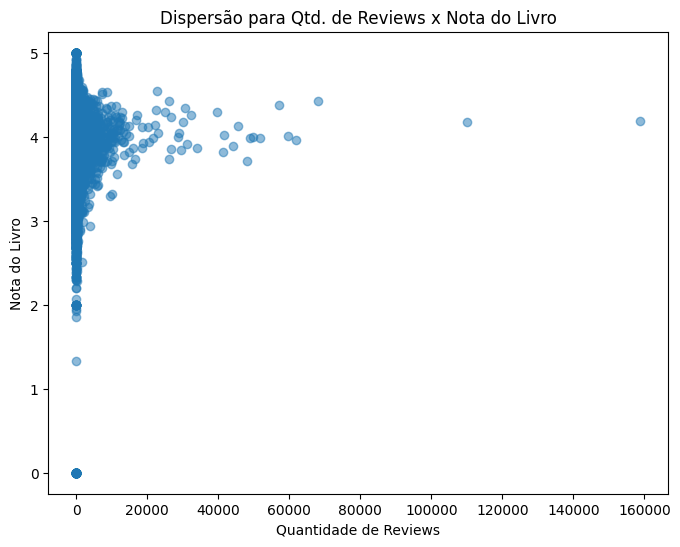

In [14]:
# Gráfico de dispersão para reviews e rating
plt.figure(figsize=(8, 6))
plt.scatter(amostradf['reviews'], amostradf['rating'], alpha=0.5)
plt.title('Dispersão para Qtd. de Reviews x Nota do Livro')
plt.xlabel('Quantidade de Reviews')
plt.ylabel('Nota do Livro')
plt.show()

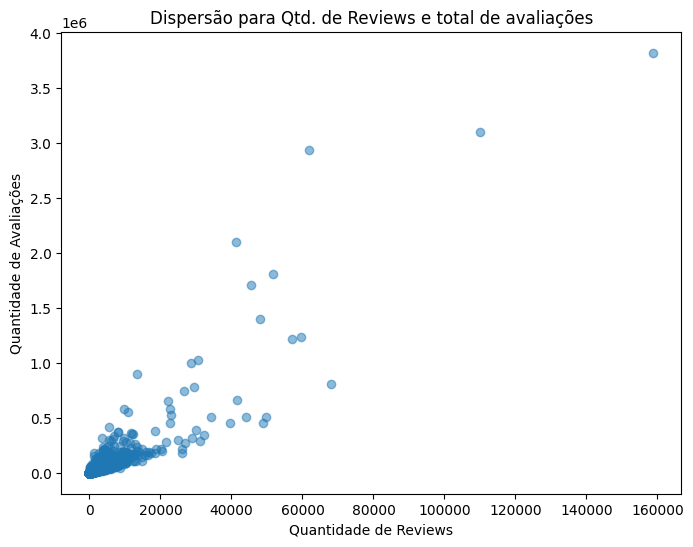

In [15]:
# Gráfico de dispersão para reviews e totalratings
plt.figure(figsize=(8, 6))
plt.scatter(amostradf['reviews'], amostradf['totalratings'], alpha=0.5)
plt.title('Dispersão para Qtd. de Reviews e total de avaliações')
plt.xlabel('Quantidade de Reviews')
plt.ylabel('Quantidade de Avaliações')
plt.show()